In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from collections import defaultdict
#https://oracleselixir.com/stats/champions/explorer
#12.01~13.06 Champion Stats Explorer

# read csv - Champion Stats

In [3]:
League = pd.read_csv('Champion Stats - OraclesElixir.csv')

In [38]:
League

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,48,3.2%,1.7%,4.9%,35%,56%,131,157,...,-131,29,-3.7,8.3,25.1%,509,24.7%,22.5%,0.39,0.19
1,Ahri,Middle,292,19.5%,12.7%,32.1%,50%,50%,901,545,...,60,11,1,8.5,25.0%,532,25.7%,22.8%,0.49,0.31
2,Akali,Middle,146,9.7%,13.5%,23.5%,39%,63%,566,356,...,-63,74,-0.3,8.2,24.8%,486,23.9%,23.2%,0.24,0.21
3,Akali,Top,4,0.3%,13.5%,23.5%,25%,100%,11,16,...,108,300,-1.5,8,26.7%,395,19.8%,22.6%,0.31,0.28
4,Akshan,-,0,0%,0.1%,0.1%,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Ziggs,ADC,31,2.1%,3.9%,6.4%,55%,84%,88,64,...,-229,-6,-2.8,9,29.0%,792,34.9%,24.6%,0.35,0.23
199,Ziggs,Middle,6,0.4%,3.9%,6.4%,83%,33%,26,7,...,431,279,1.8,8.4,25.6%,930,34.5%,27.1%,0.49,0.14
200,Zilean,Middle,4,0.3%,0.6%,1.0%,50%,75%,7,4,...,-153,-15,-5.8,8.2,23.3%,440,23.1%,20.3%,0.33,0.07
201,Zilean,Support,2,0.1%,0.6%,1.0%,0%,100%,1,3,...,196,151,0,1.2,2.0%,60,4.6%,8.8%,1.96,0.53


# 데이터 내 결측치 파악

In [4]:
League.isnull().sum()

Champion    0
Pos         0
GP          0
P%          0
B%          0
P+B%        0
W%          0
CTR%        0
K           0
D           0
A           0
KDA         0
KP          0
DTH%        0
FB%         0
GD10        0
XPD10       0
CSD10       0
CSPM        0
CS%P15      0
DPM         0
DMG%        0
GOLD%       0
WPM         0
WCPM        0
dtype: int64

1. 챔피언별 게임플레이 파악

In [5]:
gp_data = League[["Champion","Pos","GP"]]
gp_data["Champion"] = gp_data["Champion"] +'(' +gp_data["Pos"] + ')'

gp_data_with_pos = gp_data

gp_data_with_pos

C:\Users\BRENA-53\AppData\Local\Temp\ipykernel_3572\772213585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_data["Champion"] = gp_data["Champion"] +'(' +gp_data["Pos"] + ')'


,Champion,Pos,GP
0,Aatrox(Top),Top,48
1,Ahri(Middle),Middle,292
2,Akali(Middle),Middle,146
3,Akali(Top),Top,4
4,Akshan(-),-,0
...,...,...,...
198,Ziggs(ADC),ADC,31
199,Ziggs(Middle),Middle,6
200,Zilean(Middle),Middle,4
201,Zilean(Support),Support,2


In [6]:
gp_data_with_pos_filtered = gp_data_with_pos[["Champion","GP"]]
gp_data_with_pos_filtered = gp_data_with_pos_filtered.sort_values(by=['GP'],ascending=False)

gp_data_with_pos_filtered

,Champion,GP
64,K'Sante(Top),643
131,Sejuani(Jungle),577
11,Aphelios(ADC),520
185,Wukong(Jungle),491
196,Zeri(ADC),461
...,...,...
16,Azir(Support),1
181,Viktor(Top),1
141,Shen(Support),1
4,Akshan(-),0


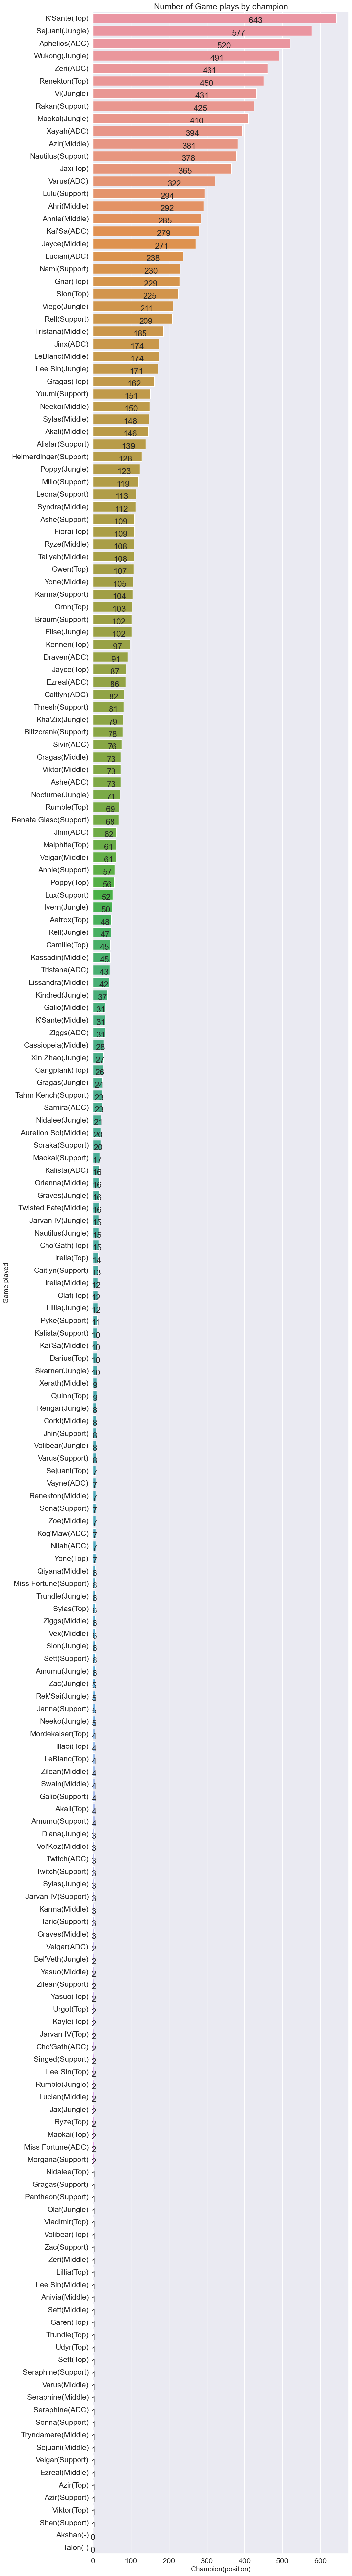

In [7]:

plt.figure(figsize=(10,100))
sb.set(font_scale=1.5)
gp_plot = sb.barplot(y='Champion',x='GP',data=gp_data_with_pos_filtered,orient='h',errorbar=None)
gp_plot.set_xlabel("Champion(position)",fontsize="15")
gp_plot.set_ylabel("Game played",fontsize="15")



for p in gp_plot.patches:
    gp_plot.text(p.get_x() + (p.get_width()*2.0/3.0) ,  
            p.get_y() + p.get_height(),   
            f"{p.get_width():.0f}",    
            ha = 'center' )   



plt.title("Number of Game plays by champion")
plt.show()
#https://blog.naver.com/PostView.naver?blogId=kiddwannabe&logNo=222655678945&categoryNo=0&parentCategoryNo=0&currentPage=1

2. match_data에서 first blood와 win과의 상관관계

In [8]:
match_data = pd.read_csv("2023_LoL_esports_match_data_from_OraclesElixir.csv")

match_data_origin=match_data

In [9]:
#https://bskyvision.com/entry/pandas-NaN-%EA%B0%92%EC%9D%B4-%EC%9E%88%EB%8A%94-%ED%96%89-%EB%98%90%EB%8A%94-%EC%97%B4-%EC%82%AD%EC%A0%9C%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95-dropna-%EB%A9%94%EC%86%8C%EB%93%9C
match_data_filtered = match_data.loc[match_data['position']=='team',['result','firstblood']]

match_data_filtered = match_data_filtered.dropna(axis=0)


match_data_filtered

,result,firstblood
10,1,0.0
11,0,1.0
22,0,0.0
23,1,1.0
34,1,0.0
...,...,...
119687,1,0.0
119698,1,1.0
119699,0,0.0
119710,1,1.0


In [10]:
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dotorimj2&logNo=222117972039
#pos = ['Top','Middle','Support','ADC','Jungle']

#for p in pos:
model=LogisticRegression()
FB = np.array(match_data_filtered.loc[:,'firstblood']).reshape((-1,1))
result = np.array(match_data_filtered.loc[:,'result'])
model.fit(FB,result)
print(' - coefficient of determination and r2 score is ',model.coef_[0],model.score(FB,result))

 - coefficient of determination and r2 score is  [0.93872644] 0.6153267842822775


In [11]:
match_data_filtered_player = match_data.loc[match_data['position']!='team',['position','result','firstblood']]

match_data_filtered_player = match_data_filtered_player.dropna(axis=0)


match_data_filtered_player

,position,result,firstblood
0,top,1,0.0
1,jng,1,0.0
2,mid,1,0.0
3,bot,1,0.0
4,sup,1,0.0
...,...,...,...
119705,top,0,0.0
119706,jng,0,0.0
119707,mid,0,0.0
119708,bot,0,0.0


In [12]:
pos = ['top','mid','sup','bot','jng']
coef_W_FB = []

FB=""
W=""
for p in pos:
    model=LogisticRegression()
    FB = np.array(match_data_filtered_player.loc[match_data_filtered_player['position']==p,'firstblood']).reshape((-1,1))
    W = np.array(match_data_filtered_player.loc[match_data_filtered_player['position']==p,'result'])
    model.fit(FB,W)
    print(p + ' - coefficient of determination and r2 score is ',model.coef_[0],model.score(FB,W))
    coef_W_FB.append(model.coef_[0][0])

top - coefficient of determination and r2 score is  [0.45138669] 0.5279573754789272
mid - coefficient of determination and r2 score is  [0.55682544] 0.5429837164750958
sup - coefficient of determination and r2 score is  [0.70099813] 0.5697437739463601
bot - coefficient of determination and r2 score is  [0.67440868] 0.5605244252873564
jng - coefficient of determination and r2 score is  [0.65732549] 0.5740541187739464


3. match_data에서 팀별 승률과 각종 킬과의 관계

In [70]:
teamList = match_data_origin['teamid'].unique()

match_data_filtered = match_data_origin.loc[match_data_origin['position']=='team',['result','teamid','kills','doublekills','triplekills','quadrakills','pentakills','minionkills','monsterkills','dragons','opp_dragons','elementaldrakes','opp_elementaldrakes','elders','opp_elders','heralds','opp_heralds','barons','opp_barons','towers','opp_towers','turretplates','opp_turretplates','inhibitors','opp_inhibitors']]

match_data_filtered = match_data_filtered.dropna(axis=0)


match_data_filtered

,result,teamid,kills,doublekills,triplekills,quadrakills,pentakills,minionkills,monsterkills,dragons,...,heralds,opp_heralds,barons,opp_barons,towers,opp_towers,turretplates,opp_turretplates,inhibitors,opp_inhibitors
10,1,oe:team:0ade5e44c23039bca133eee58ec1b83,13,1.0,1.0,0.0,0.0,1039.0,247,4.0,...,2.0,0.0,1.0,0.0,11.0,2.0,4.0,2.0,2.0,0.0
11,0,oe:team:14ad76b8d9e647d4b29c3d26ecd29c9,7,1.0,0.0,0.0,0.0,1008.0,218,3.0,...,0.0,2.0,0.0,1.0,2.0,11.0,2.0,4.0,0.0,2.0
22,0,oe:team:607baf04091e515e195644cb08ec21c,20,2.0,0.0,0.0,0.0,1111.0,225,3.0,...,2.0,0.0,2.0,1.0,5.0,11.0,6.0,2.0,0.0,3.0
23,1,oe:team:2d9e95ecefb34c32ff1a997ebe372f9,16,1.0,0.0,0.0,0.0,1102.0,261,4.0,...,0.0,2.0,1.0,2.0,11.0,5.0,2.0,6.0,3.0,0.0
34,1,oe:team:1dc6411295a36bd29c29b1096ba859d,20,2.0,2.0,0.0,0.0,876.0,231,4.0,...,0.0,2.0,0.0,1.0,7.0,4.0,3.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119687,1,oe:team:1d1d0b0c76290957c7c9aa69a3ae4e7,27,4.0,1.0,0.0,0.0,724.0,185,4.0,...,1.0,1.0,1.0,0.0,10.0,1.0,4.0,4.0,2.0,0.0
119698,1,oe:team:1d1d0b0c76290957c7c9aa69a3ae4e7,26,2.0,1.0,0.0,0.0,700.0,156,4.0,...,2.0,0.0,1.0,0.0,8.0,2.0,7.0,4.0,1.0,0.0
119699,0,oe:team:8776b7033f1bc10634e50d90f861c1d,11,1.0,0.0,0.0,0.0,674.0,139,0.0,...,0.0,2.0,0.0,1.0,2.0,8.0,4.0,7.0,0.0,1.0
119710,1,oe:team:1d1d0b0c76290957c7c9aa69a3ae4e7,40,4.0,0.0,0.0,0.0,654.0,173,0.0,...,1.0,1.0,1.0,0.0,10.0,1.0,8.0,4.0,2.0,0.0


In [71]:
winRate = defaultdict()
for team in teamList:
    teamFiltered = match_data_filtered.loc[match_data_filtered['teamid'] == team]
    winRate[team] = teamFiltered['result'].mean()


winRate

defaultdict(None,
            {'oe:team:0ade5e44c23039bca133eee58ec1b83': 0.4444444444444444,
             'oe:team:14ad76b8d9e647d4b29c3d26ecd29c9': 0.16666666666666666,
             'oe:team:607baf04091e515e195644cb08ec21c': 0.59375,
             'oe:team:2d9e95ecefb34c32ff1a997ebe372f9': 0.4634146341463415,
             'oe:team:1dc6411295a36bd29c29b1096ba859d': 0.803921568627451,
             'oe:team:e05fc2a9f99e906ea564a672d75f839': 0.4444444444444444,
             'oe:team:e0ec1fed6e0949a0aef5f506ccb76ce': 0.4716981132075472,
             'oe:team:7380b73561abdd86c2391e9481acd4b': 0.4772727272727273,
             'oe:team:f9d5cf621532c5ac51e0947d7098b7f': 0.5555555555555556,
             'oe:team:ad003d7f74930eeab29a6029c3b9f52': 0.44680851063829785,
             'oe:team:4054ca135a8ad4383af9b6bed4fabcf': 0.07692307692307693,
             'oe:team:3eb6b5da983552dd32f84d7f0e99717': 0.6428571428571429,
             'oe:team:57ab4379bc2ebd5a0f7f53e791060cd': 0.23076923076923078,
  

In [40]:
#'kills','doublekills','triplekills','quadrakills','pentakills','minionkills','monsterkills'

killDict = {}
doubleDict = {}
tripleDict = {}
quadraDict = {}
pentaDict = {}
minionDict = {}
monsterDict = {}
dragonDict = {}
oppDragonDict = {}
elementaldrakesDict = {}
oppElementaldrakes = {}
elders = {}
oppElders = {}
heralds = {}
opp_heralds = {}
barons = {}
opp_barons = {}
towers = {}
opp_towers = {}
turretplates = {}
opp_turretplates = {}
inhibitors = {}
opp_inhibitors = {}
for team in teamList:
    teamFiltered = match_data_filtered.loc[match_data_filtered['teamid'] == team]
    killDict[team] = teamFiltered['kills'].mean()
    doubleDict[team] = teamFiltered['doublekills'].mean()
    tripleDict[team] = teamFiltered['triplekills'].mean()
    quadraDict[team] = teamFiltered['quadrakills'].mean()
    pentaDict[team] = teamFiltered['pentakills'].mean()
    minionDict[team] = teamFiltered['minionkills'].mean()
    monsterDict[team] = teamFiltered['monsterkills'].mean()
    dragonDict [team] = teamFiltered['dragons'].mean()
    oppDragonDict[team] = teamFiltered['opp_dragons'].mean()
    elementaldrakesDict[team] = teamFiltered['elementaldrakes'].mean()
    oppElementaldrakes[team] = teamFiltered['opp_elementaldrakes'].mean()
    elders[team]= teamFiltered['elders'].mean()
    oppElders [team]= teamFiltered['opp_elders'].mean()
    heralds[team]= teamFiltered['heralds'].mean()
    opp_heralds[team]= teamFiltered['opp_heralds'].mean()
    barons[team]= teamFiltered['barons'].mean()
    opp_barons[team]= teamFiltered['opp_barons'].mean()
    towers[team]= teamFiltered['towers'].mean()
    opp_towers [team]= teamFiltered['opp_towers'].mean()
    turretplates[team]= teamFiltered['turretplates'].mean()
    opp_turretplates [team]= teamFiltered['opp_turretplates'].mean()
    inhibitors[team]= teamFiltered['inhibitors'].mean()
    opp_inhibitors[team]= teamFiltered['opp_inhibitors'].mean()


In [59]:
relationDf = pd.DataFrame(columns=["teamid","winRate","Kills","doubleKills","tripleKill","quadraKill","pentaKill","minionKill","monsterKill",'dragons','opp_dragons','elementaldrakes','opp_elementaldrakes','elders','opp_elders','heralds','opp_heralds','barons','opp_barons','towers','opp_towers','turretplates','opp_turretplates','inhibitors','opp_inhibitors'])

In [66]:
for team in teamList:
    relationDf.loc[-1] = [team,winRate[team],killDict[team],doubleDict[team],tripleDict[team],quadraDict[team],pentaDict[team],minionDict[team],monsterDict[team]]
    relationDf.index = relationDf.index + 1

relationDf = relationDf.sort_index()

In [67]:
relationDf

,teamid,winRate,Kills,doubleKills,tripleKill,quadraKill,pentaKill,minionKill,monsterKill
0,oe:team:f9f16e15a84c85d050aa09b4a21c757,0.444444,17.333333,1.333333,0.111111,0.000000,0.000000,759.000000,189.111111
1,oe:team:ccf3ac6ecc7f9a46f87a052deebe32e,0.000000,7.777778,0.888889,0.000000,0.000000,0.000000,686.111111,143.888889
2,oe:team:b3407aff8f36af4d7492aceb5b6bfd6,0.454545,18.272727,1.727273,0.272727,0.000000,0.000000,685.181818,157.090909
3,oe:team:27b676a1e4c8cf0fa2eb95072cf19a6,0.142857,11.571429,0.428571,0.000000,0.000000,0.000000,706.142857,148.142857
4,oe:team:c94055c4eae45033b3e176ed7c35585,0.384615,13.076923,1.615385,0.230769,0.000000,0.000000,827.384615,178.461538
...,...,...,...,...,...,...,...,...,...
893,oe:team:1dc6411295a36bd29c29b1096ba859d,0.803922,18.960784,2.627451,0.372549,0.000000,0.000000,766.215686,167.196078
894,oe:team:2d9e95ecefb34c32ff1a997ebe372f9,0.463415,13.975610,1.585366,0.243902,0.048780,0.024390,822.073171,182.585366
895,oe:team:607baf04091e515e195644cb08ec21c,0.593750,16.500000,2.000000,0.343750,0.031250,0.000000,825.875000,183.156250
896,oe:team:14ad76b8d9e647d4b29c3d26ecd29c9,0.166667,11.138889,1.333333,0.166667,0.000000,0.000000,782.916667,164.166667


In [68]:
relationDf.dropna(axis=0)

relationDf

,teamid,winRate,Kills,doubleKills,tripleKill,quadraKill,pentaKill,minionKill,monsterKill
0,oe:team:f9f16e15a84c85d050aa09b4a21c757,0.444444,17.333333,1.333333,0.111111,0.000000,0.000000,759.000000,189.111111
1,oe:team:ccf3ac6ecc7f9a46f87a052deebe32e,0.000000,7.777778,0.888889,0.000000,0.000000,0.000000,686.111111,143.888889
2,oe:team:b3407aff8f36af4d7492aceb5b6bfd6,0.454545,18.272727,1.727273,0.272727,0.000000,0.000000,685.181818,157.090909
3,oe:team:27b676a1e4c8cf0fa2eb95072cf19a6,0.142857,11.571429,0.428571,0.000000,0.000000,0.000000,706.142857,148.142857
4,oe:team:c94055c4eae45033b3e176ed7c35585,0.384615,13.076923,1.615385,0.230769,0.000000,0.000000,827.384615,178.461538
...,...,...,...,...,...,...,...,...,...
893,oe:team:1dc6411295a36bd29c29b1096ba859d,0.803922,18.960784,2.627451,0.372549,0.000000,0.000000,766.215686,167.196078
894,oe:team:2d9e95ecefb34c32ff1a997ebe372f9,0.463415,13.975610,1.585366,0.243902,0.048780,0.024390,822.073171,182.585366
895,oe:team:607baf04091e515e195644cb08ec21c,0.593750,16.500000,2.000000,0.343750,0.031250,0.000000,825.875000,183.156250
896,oe:team:14ad76b8d9e647d4b29c3d26ecd29c9,0.166667,11.138889,1.333333,0.166667,0.000000,0.000000,782.916667,164.166667


# 부록. position별 FB 대비 W 비교

In [48]:
leagueFiltered = League.loc[(League['GP'])>=20]

In [49]:
leagueFiltered["Champion"] = leagueFiltered["Champion"] +'(' +leagueFiltered["Pos"] + ')'

C:\Users\BRENA-53\AppData\Local\Temp\ipykernel_17496\1991823725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagueFiltered["Champion"] = leagueFiltered["Champion"] +'(' +leagueFiltered["Pos"] + ')'


In [50]:
w_relation = leagueFiltered[["Champion","Pos","W%","FB%"]]

In [51]:
w_relation['W%'] = w_relation['W%'].astype(str).str.rstrip('%').astype('float')/100.0

w_relation['FB%'] = w_relation['FB%'].astype(str).str.rstrip('%').astype('float')/100.0

w_relation = w_relation.rename(columns={'W%':'W'})

w_relation = w_relation.rename(columns={'FB%':'FB'})

w_relation

C:\Users\BRENA-53\AppData\Local\Temp\ipykernel_17496\4006246184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_relation['W%'] = w_relation['W%'].astype(str).str.rstrip('%').astype('float')/100.0
C:\Users\BRENA-53\AppData\Local\Temp\ipykernel_17496\4006246184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_relation['FB%'] = w_relation['FB%'].astype(str).str.rstrip('%').astype('float')/100.0


,Champion,Pos,W,FB
0,Aatrox(Top),Top,0.35,0.02
1,Ahri(Middle),Middle,0.50,0.08
2,Akali(Middle),Middle,0.39,0.05
5,Alistar(Support),Support,0.49,0.19
9,Annie(Middle),Middle,0.52,0.05
...,...,...,...,...
188,Xin Zhao(Jungle),Jungle,0.26,0.19
191,Yone(Middle),Middle,0.62,0.10
193,Yuumi(Support),Support,0.48,0.10
196,Zeri(ADC),ADC,0.50,0.11


<Axes: xlabel='FB', ylabel='W'>

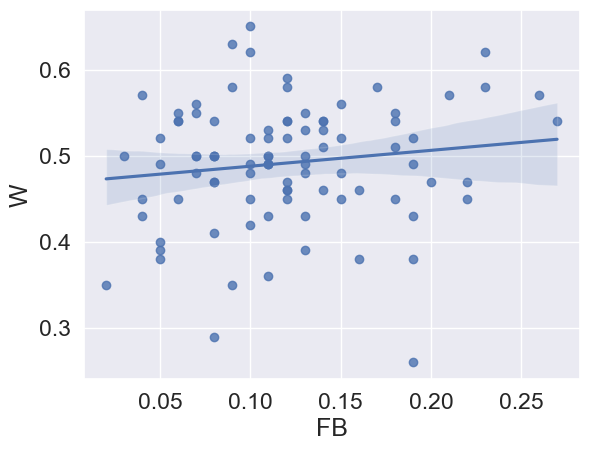

In [52]:
sb.regplot(data=w_relation,x='FB',y='W')

<Axes: xlabel='FB', ylabel='W'>

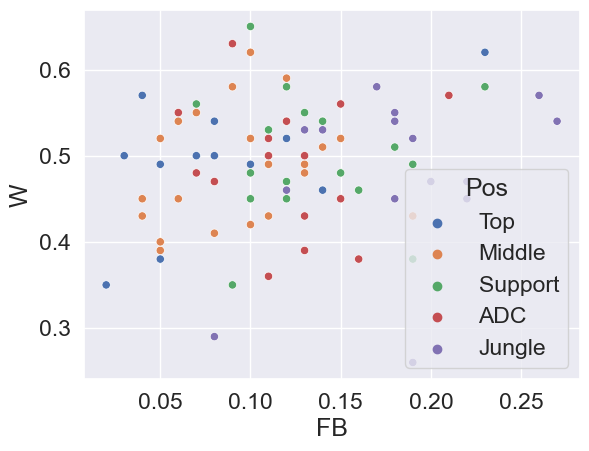

In [53]:
sb.scatterplot(data=w_relation,x='FB',y='W',hue='Pos')

<Axes: title={'center': 'Jungle'}, xlabel='First Blood', ylabel='W'>

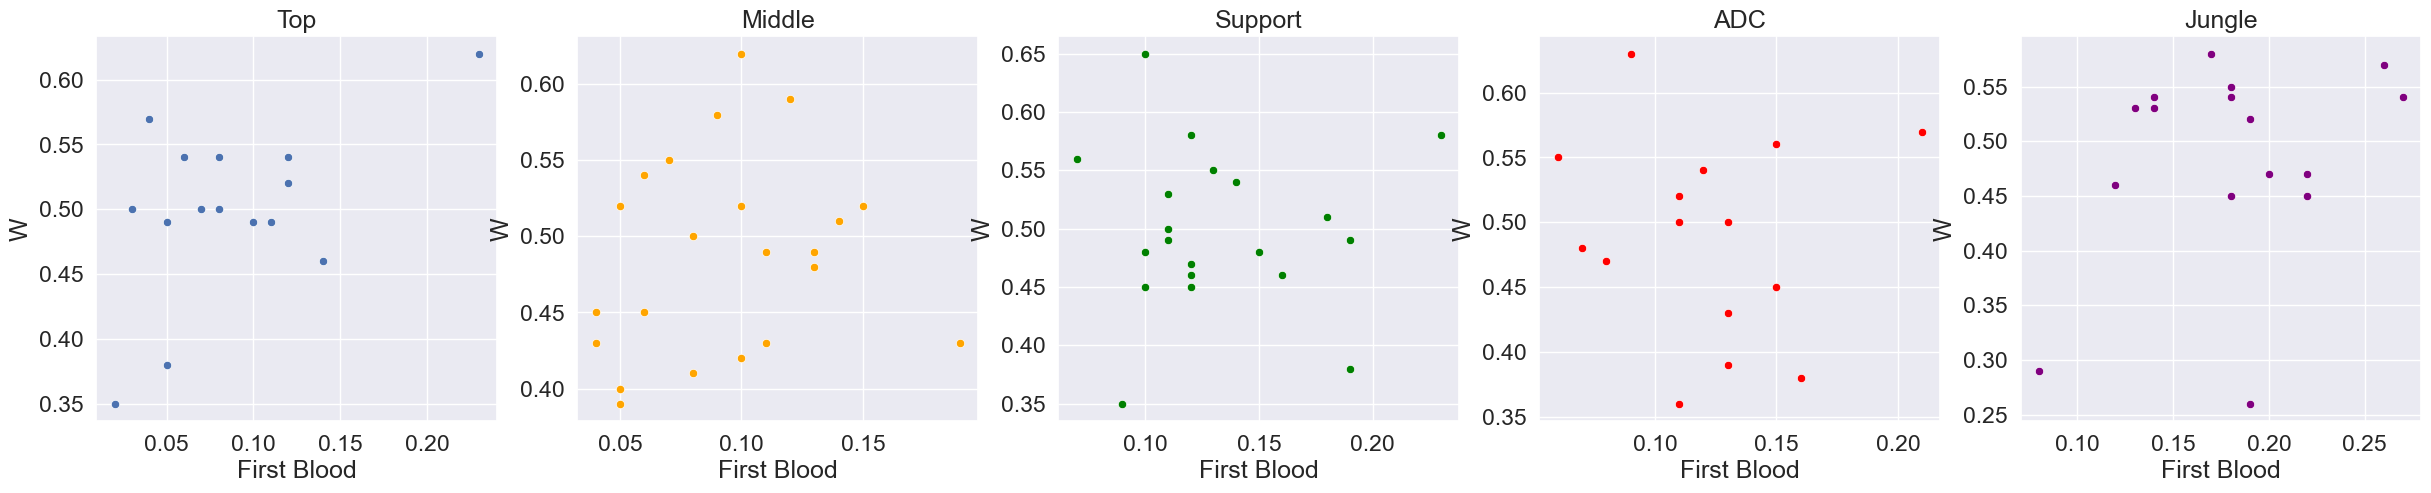

In [54]:

fig,ax = plt.subplots(ncols=5,figsize=(30,5))
ax[0].set_title("Top")
ax[1].set_title("Middle")
ax[2].set_title("Support")
ax[3].set_title("ADC")
ax[4].set_title("Jungle")

for a in ax:
    a.set_xlabel('First Blood')

sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Top',:],x='FB',y='W',ax=ax[0])
sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Middle',:],x='FB',y='W',ax=ax[1],color='orange')
sb.scatterplot(data=w_relation.loc[w_relation['Pos']=='Support',:],x='FB',y='W',ax=ax[2],color='green')
sb.scatterplot(data=w_relation.loc[(w_relation['Pos']=='ADC') ,:],x='FB',y='W',ax=ax[3],color='red')
sb.scatterplot(data=w_relation.loc[(w_relation['Pos']=='Jungle'),:],x='FB',y='W',ax=ax[4],color='purple')


<Axes: title={'center': 'Jungle'}, xlabel='FB', ylabel='W'>

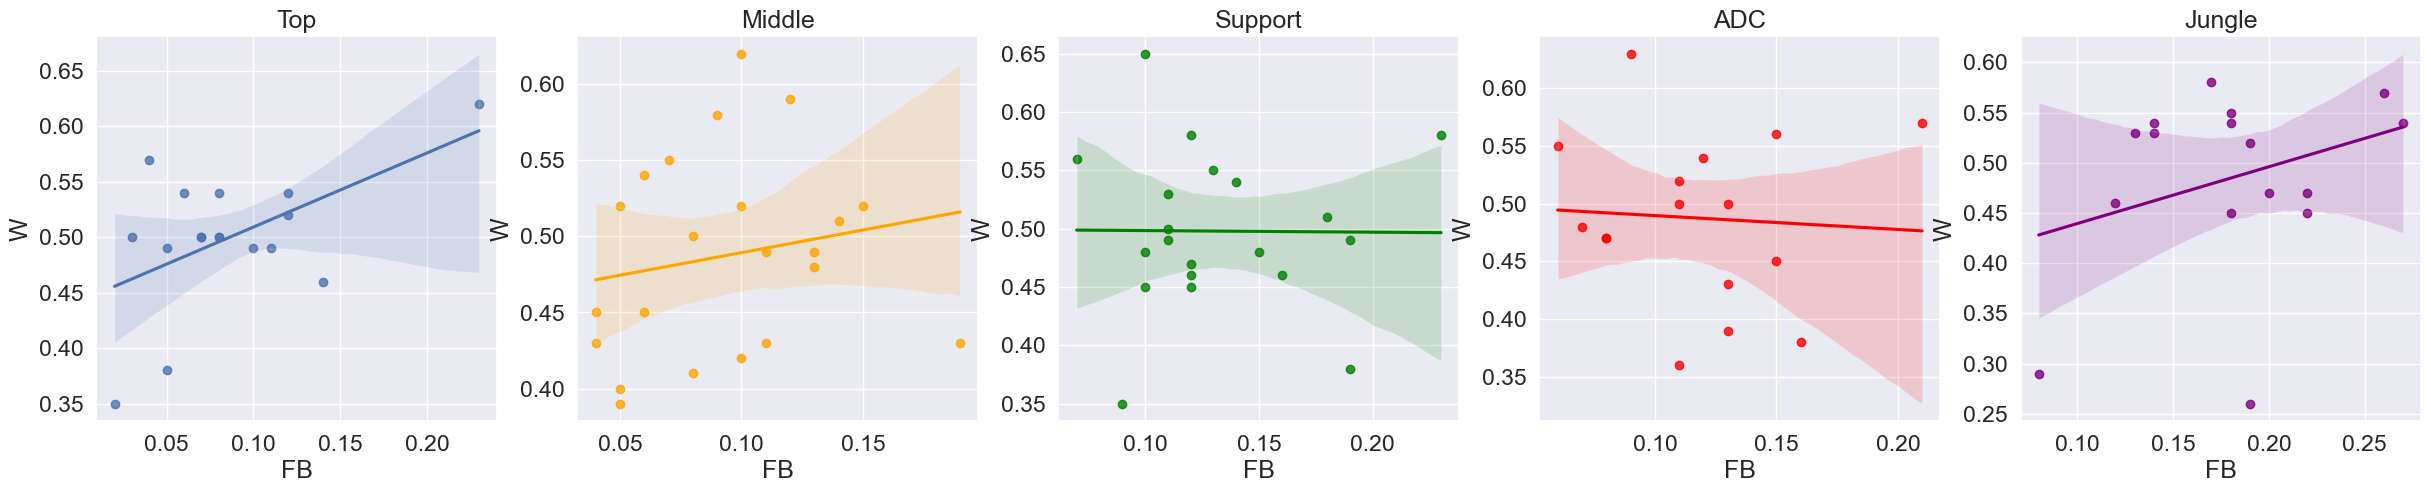

In [55]:
fig,ax = plt.subplots(ncols=5,figsize=(30,5))
ax[0].set_title("Top")
ax[1].set_title("Middle")
ax[2].set_title("Support")
ax[3].set_title("ADC")
ax[4].set_title("Jungle")

for a in ax:
    a.set_xlabel('First Blood')

sb.regplot(data=w_relation.loc[w_relation['Pos']=='Top',:],x='FB',y='W',ax=ax[0])
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Middle',:],x='FB',y='W',ax=ax[1],color='orange')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Support',:],x='FB',y='W',ax=ax[2],color='green')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='ADC',:],x='FB',y='W',ax=ax[3],color='red')
sb.regplot(data=w_relation.loc[w_relation['Pos']=='Jungle',:],x='FB',y='W',ax=ax[4],color='purple')


In [56]:
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dotorimj2&logNo=222117972039
pos = ['Top','Middle','Support','ADC','Jungle']

FB=""
W=""
for p in pos:
    model=LinearRegression()
    FB = np.array(w_relation.loc[w_relation['Pos']==p,'FB']).reshape((-1,1))
    W = np.array(w_relation.loc[w_relation['Pos']==p,'W']).reshape((-1,1))
    model.fit(FB,W)
    print(p + ' - coefficient of determination and r2 score is ',model.coef_[0],model.score(FB,W))


Top - coefficient of determination and r2 score is  [0.66759286] 0.28323061537809147
Middle - coefficient of determination and r2 score is  [0.29722715] 0.03354596933393994
Support - coefficient of determination and r2 score is  [-0.01376147] 6.357035320858628e-05
ADC - coefficient of determination and r2 score is  [-0.1202585] 0.003871137020127202
Jungle - coefficient of determination and r2 score is  [0.56624109] 0.09516774026977404
